In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

In [3]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [842]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)  # Отображать все колонки

from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import fbeta_score
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.feature_selection import SequentialFeatureSelector
from datetime import datetime
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import FixedThresholdClassifier

# pip install featuretools

from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, f1_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix



## EDA

In [7]:
# Целевая переменная:

# Diabetes_binary - Наличие диабета: 0 = нет диабета, 1 = преддиабет или диабет
# Признаки:

# HighBP - Повышенное артериальное давление: 0 = нет высокого давления, 1 = высокое давление
# HighChol - Высокий уровень холестерина: 0 = нет высокого холестерина, 1 = высокий холестерин
# CholCheck - Проверка холестерина: 0 = не делал проверку холестерина за последние 5 лет, 1 = делал проверку холестерина за последние 5 лет
# BMI - Индекс массы тела (Body Mass Index)
# Smoker - Курильщик: Вы выкурили по крайней мере 100 сигарет за всю жизнь? (Примечание: 5 пачек = 100 сигарет) 0 = нет, 1 = да
# Stroke - Был ли когда-либо инсульт: 0 = нет, 1 = да
# HeartDiseaseorAttack - Ишемическая болезнь сердца или инфаркт миокарда: 0 = нет, 1 = да
# PhysActivity - Физическая активность за последние 30 дней (не включая работу): 0 = нет, 1 = да
# Fruits - Потребление фруктов 1 и более раз в день: 0 = нет, 1 = да
# Veggies - Потребление овощей 1 и более раз в день: 0 = нет, 1 = да
# HvyAlcoholConsump - Чрезмерное потребление алкоголя (взрослые мужчины ≥14 напитков в неделю, взрослые женщины ≥7 напитков в неделю): 0 = нет, 1 = да
# AnyHealthcare - Наличие какого-либо медицинского страхования или плана (включая медицинскую страховку, предварительно оплаченные планы, такие как HMO и т. д.): 0 = нет, 1 = да
# NoDocbcCost - Были ли случаи за последние 12 месяцев, когда вам нужно было обратиться к врачу, но вы не могли из-за стоимости: 0 = нет, 1 = да

# GenHlth - Как бы вы оценили общее состояние вашего здоровья: шкала от 1 до 5,
# 1 = Отличное
# 2 = Очень хорошее
# 3 = Хорошее
# 4 = Удовлетворительное
# 5 = Плохое

# MentHlth - Количество дней с плохим психическим здоровьем за последние 30 дней: шкала от 1 до 30 дней
# PhysHlth - Количество дней физического недомогания или травмы за последние 30 дней: шкала от 1 до 30 дней
# DiffWalk - Испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице: 0 = нет, 1 = да
# Sex - Пол: 0 = женский, 1 = мужской

# Age - Возрастная категория (13 уровней):
# 1 = от 18 до 24 лет
# 2 = от 25 до 29 лет
# 3 = от 30 до 34 лет
# 4 = от 35 до 39 лет
# 5 = от 40 до 44 лет
# 6 = от 45 до 49 лет
# 7 = от 50 до 54 лет
# 8 = от 55 до 59 лет
# 9 = от 60 до 64 лет
# 10 = от 65 до 69 лет
# 11 = от 70 до 74 лет
# 12 = от 75 до 79 лет
# 13 = 80 лет и старше

# Education - Уровень образования (шкала от 1 до 6):
# 1 = Никогда не посещал школу или только детский сад
# 2 = Начальная школа (1-8 классы)
# 3 = Средняя школа (9-11 классы)
# 4 = Окончил среднюю школу (12 класс)
# 5 = Некоторое обучение в колледже или техническом училище
# 6 = Окончил колледж или техническое училище

# Income - Уровень дохода (шкала от 1 до 8):
# 1 = Менее 10 000 долларов США
# 2 = От 10 000 до 15 000 долларов США
# 3 = От 15 000 до 20 000 долларов США
# 4 = От 20 000 до 25 000 долларов США
# 5 = От 25 000 до 35 000 долларов США
# 6 = От 35 000 до 50 000 долларов США
# 7 = От 50 000 до 75 000 долларов США
# 8 = 75 000 долларов США и более

In [28]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
path_y = 'train_Y.csv'

In [54]:
X_df = pd.read_csv(path_train)
y_df = pd.read_csv(path_y)

In [32]:
print(X_df.shape)
print(y_df.shape)

(47363, 21)
(47363, 1)


In [40]:
df = X_df.join(y_df, how='outer')
display(df.head(3))
df.shape

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0,1.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0,1.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0,1.0


(47363, 22)

In [56]:
df.duplicated().sum() # Колво дубликатов

0

In [58]:
df = df.drop_duplicates()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46578 entries, 0 to 47362
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                46578 non-null  float64
 1   HighChol              46578 non-null  float64
 2   CholCheck             46578 non-null  float64
 3   BMI                   46578 non-null  float64
 4   Smoker                46578 non-null  float64
 5   Stroke                46578 non-null  float64
 6   HeartDiseaseorAttack  46578 non-null  float64
 7   PhysActivity          46578 non-null  float64
 8   Fruits                46578 non-null  float64
 9   Veggies               46578 non-null  float64
 10  HvyAlcoholConsump     46578 non-null  float64
 11  AnyHealthcare         46578 non-null  float64
 12  NoDocbcCost           46578 non-null  float64
 13  GenHlth               46578 non-null  float64
 14  MentHlth              46578 non-null  float64
 15  PhysHlth              46

In [62]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.00000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000
mean,0.569496,0.527717,0.975396,29.934604,0.480205,0.063893,0.150908,0.697153,0.606102,0.78550,0.043046,0.953819,0.095732,2.854588,3.795247,5.885289,0.256602,0.457147,8.601979,4.908304,5.668749,0.505968
std,0.495152,0.499237,0.154916,7.168650,0.499613,0.244565,0.357963,0.459494,0.488618,0.41048,0.202963,0.209878,0.294226,1.108264,8.199532,10.100270,0.436762,0.498166,2.853608,1.027933,2.174496,0.499970
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [64]:
def classify_columns(df):
    numeric_columns = []
    categorical_columns = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            numeric_columns.append(column)
        else:
            categorical_columns.append(column)

    return numeric_columns, categorical_columns

numeric_columns, categorical_columns = classify_columns(df)

print("Числовые колонки:", numeric_columns)
print("Категориальные колонки:", categorical_columns)

Числовые колонки: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary']
Категориальные колонки: []


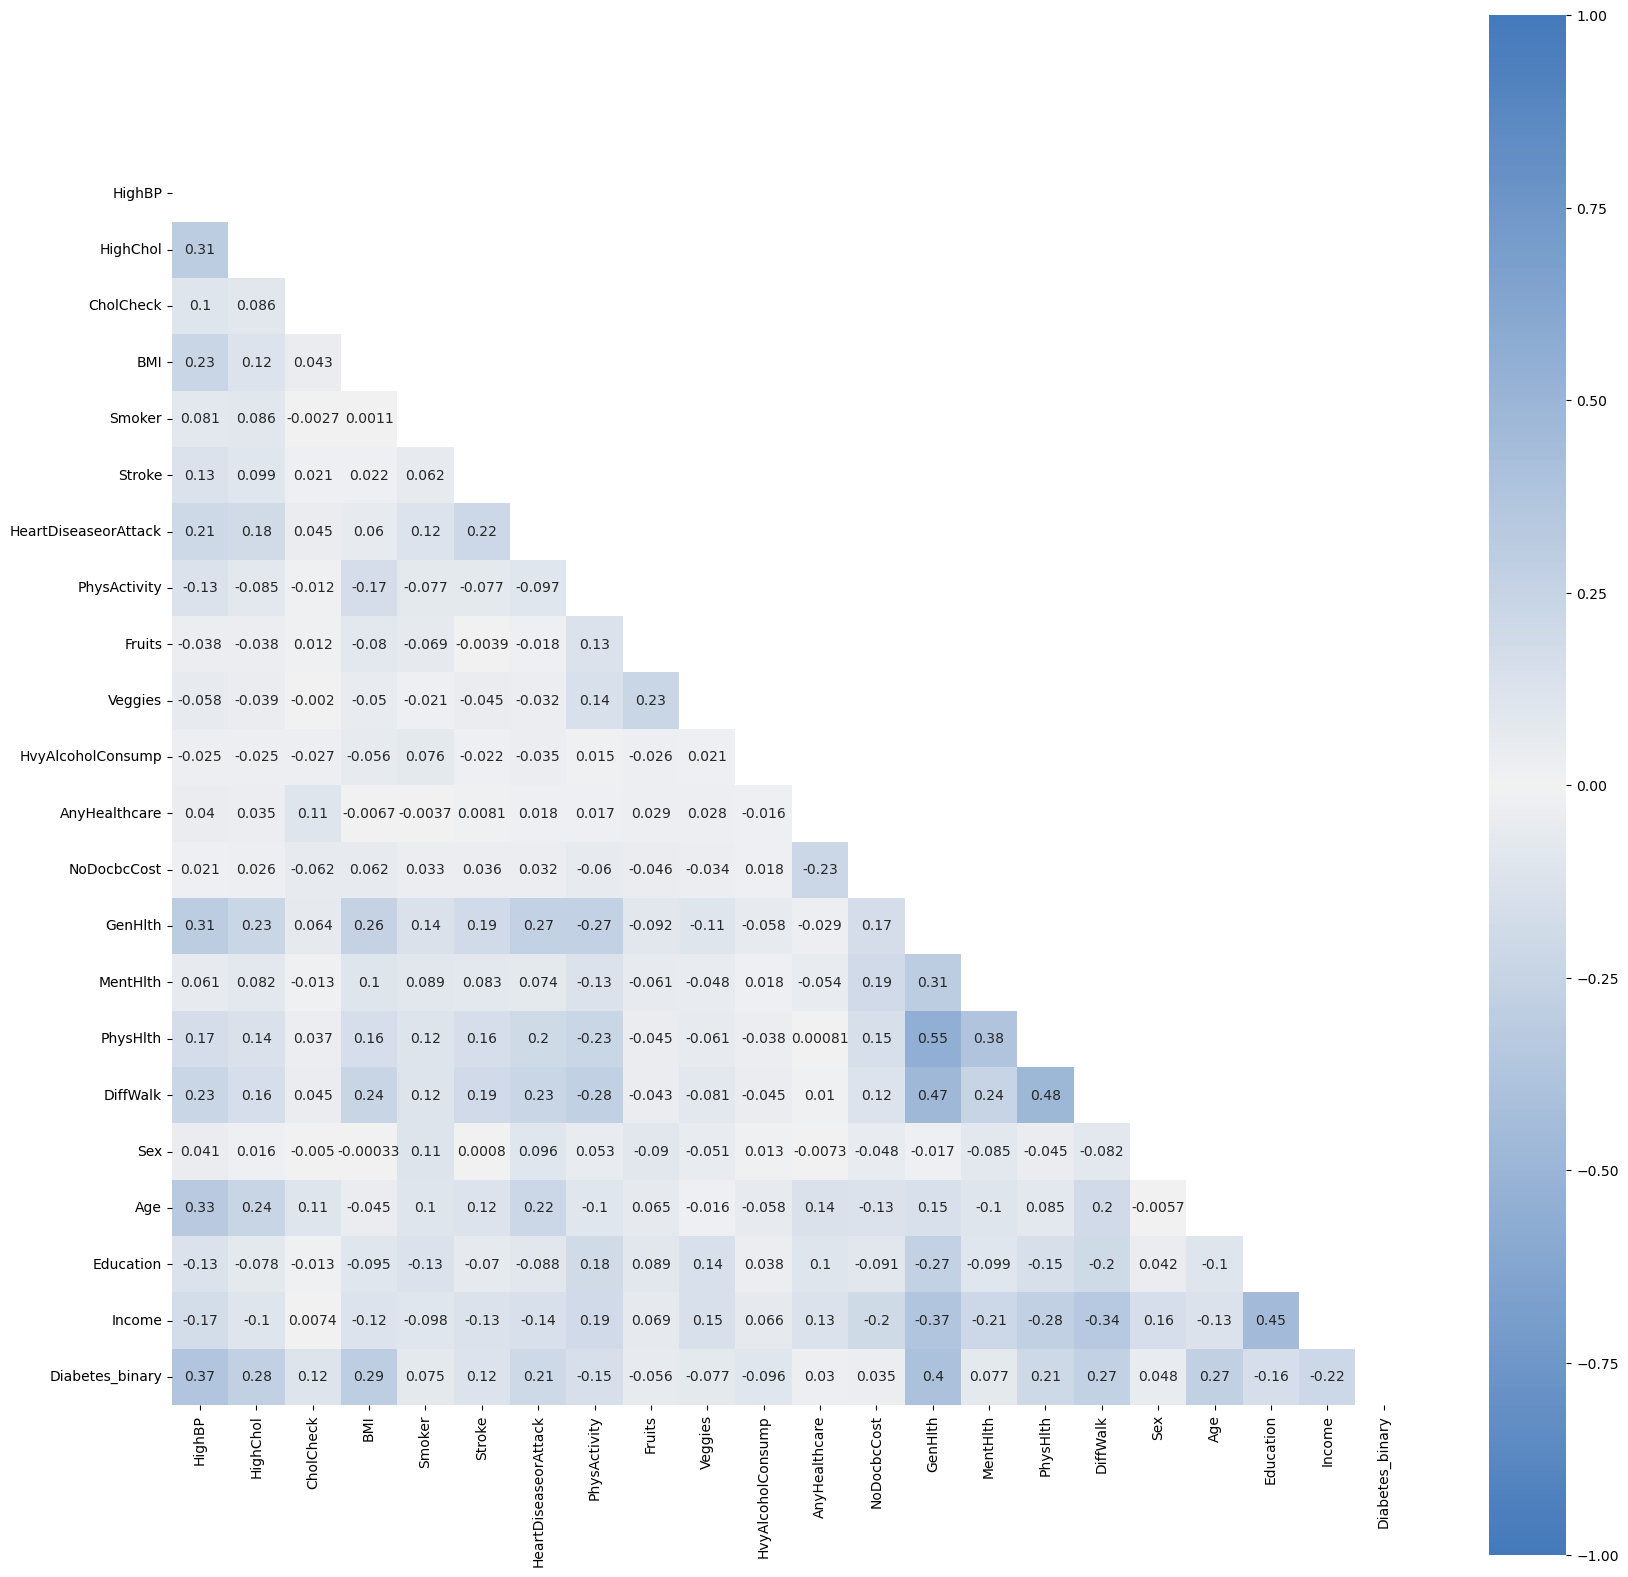

In [66]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = True,
    vmin=-1.0, vmax=1.0, # всегда ставить от -1 до 1 ставим два одинаковых цвета на оба конца
    square=True,
    ax=ax);

In [68]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
print(missing_summary)

Размерность датафрейма:
(46578, 22)

Сводка по отсутствующим значениям и уникальным значениям:
                      Missing Values Count  Missing Values Percentage  \
HighBP                                   0                        0.0   
HighChol                                 0                        0.0   
CholCheck                                0                        0.0   
BMI                                      0                        0.0   
Smoker                                   0                        0.0   
Stroke                                   0                        0.0   
HeartDiseaseorAttack                     0                        0.0   
PhysActivity                             0                        0.0   
Fruits                                   0                        0.0   
Veggies                                  0                        0.0   
HvyAlcoholConsump                        0                        0.0   
AnyHealthcare                

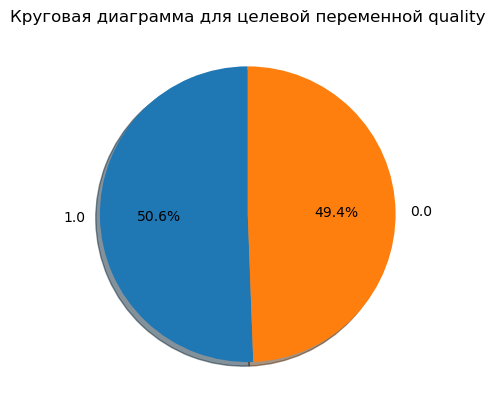

In [115]:
plt.pie(x=df['Diabetes_binary'].value_counts().values,
        labels=df['Diabetes_binary'].value_counts().index,
        startangle=90,
        autopct='%1.1f%%',
        shadow=True
       )
plt.title(f'Круговая диаграмма для целевой переменной quality')
plt.show()

In [129]:
print(df[['Age', 'Education', 'Income']].nunique())

Age          13
Education     6
Income        8
dtype: int64


In [131]:
print(df[['BMI', 'MentHlth', 'PhysHlth']].describe())

                BMI      MentHlth      PhysHlth
count  46578.000000  46578.000000  46578.000000
mean      29.934604      3.795247      5.885289
std        7.168650      8.199532     10.100270
min       12.000000      0.000000      0.000000
25%       25.000000      0.000000      0.000000
50%       29.000000      0.000000      0.000000
75%       33.000000      2.000000      6.000000
max       98.000000     30.000000     30.000000


<Axes: ylabel='BMI'>

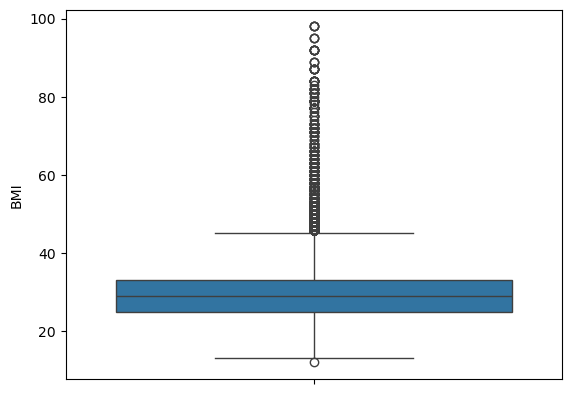

In [133]:
sns.boxplot(df['BMI'])

In [137]:
binary_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                  'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                  'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                  'DiffWalk', 'Sex']
for col in binary_columns:
    print(f"{col}: {df[col].unique()}")

HighBP: [0. 1.]
HighChol: [0. 1.]
CholCheck: [1. 0.]
Smoker: [1. 0.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [1. 0.]
PhysActivity: [1. 0.]
Fruits: [1. 0.]
Veggies: [0. 1.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [1. 0.]
NoDocbcCost: [0. 1.]
DiffWalk: [0. 1.]
Sex: [0. 1.]


## Random Forest

In [442]:
# f_beta = fbeta_score(y_true, y_pred, np.sqrt(2))
# print(f"F-beta Score (beta=sqrt(2)): {f_beta}")
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [444]:
rf = RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score = True, n_jobs=-1) 
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=-1,
                       oob_score=True)

In [445]:
print('Правильность на OOB: {:.3f}'.format(rf.oob_score_))

y_train_pred = rf.predict(X_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(X_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

Правильность на OOB: 0.732
F-beta на обучающем наборе (beta=sqrt(2)): 0.997
F-beta на тестовом наборе (beta=sqrt(2)): 0.759


In [168]:
# oob_scores = []
# f_beta_train_scores = []
# f_beta_test_scores = []

# n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500, 1000, 2000]

# for n in n_estimators:
#     rf = RandomForestClassifier(n_estimators=n, criterion='entropy', oob_score=True, random_state=0, n_jobs=-1)
#     rf.fit(X_train, y_train)
    
#     oob_scores.append(rf.oob_score_)
    
#     # F-beta для обучающего набора
#     y_train_pred = rf.predict(X_train)
#     f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
#     f_beta_train_scores.append(f_beta_train)
    
#     # F-beta для тестового набора
#     y_test_pred = rf.predict(X_test)
#     f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
#     f_beta_test_scores.append(f_beta_test)

# # Построение графиков
# plt.figure(figsize=(15, 5))

# # График OOB-оценки
# plt.subplot(1, 2, 1)
# plt.plot(n_estimators, oob_scores, label='OOB Score', marker='o')
# plt.xlabel('Количество деревьев')
# plt.ylabel('OOB-оценка')
# plt.title('Зависимость OOB-оценки от количества деревьев')
# plt.grid(True)
# plt.legend()

# # График F-beta метрик
# plt.subplot(1, 2, 2)
# plt.plot(n_estimators, f_beta_train_scores, label='F-beta (Train)', marker='o')
# plt.plot(n_estimators, f_beta_test_scores, label='F-beta (Test)', marker='o')
# plt.xlabel('Количество деревьев')
# plt.ylabel('F-beta (beta=sqrt(2))')
# plt.title('F-beta метрика для обучающего и тестового набора')
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()


In [157]:
# Возьмем 1000 деревьев

In [158]:
rf = RandomForestClassifier(criterion='gini', n_estimators=1000, oob_score = True, n_jobs=-1) 
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True)

In [159]:
print('Правильность на OOB: {:.3f}'.format(rf.oob_score_))

y_train_pred = rf.predict(X_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(X_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

Правильность на OOB: 0.731
F-beta на обучающем наборе (beta=sqrt(2)): 0.997
F-beta на тестовом наборе (beta=sqrt(2)): 0.760


## Подбор параметров

In [178]:
# param_grid = {
#     'n_estimators': [1000],
#     'max_depth': [None, 10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2', None],
#     'bootstrap': [True],
#     'criterion': ['gini', 'entropy']
# }

# # Функция для случайного выбора комбинаций гиперпараметров
# def random_parameter_search(param_grid, n_iter=50):
#     import random
#     param_list = []
#     for _ in range(n_iter):
#         params = {k: random.choice(v) for k, v in param_grid.items()}
#         param_list.append(params)
#     return param_list

# # Получаем список случайных параметров
# param_list = random_parameter_search(param_grid, n_iter=50)

# # Переменные для сохранения лучших результатов
# best_oob_score = 0
# best_fbeta_score = 0
# best_params = {}
# best_model = None

# # Цикл по списку параметров
# for params in param_list:
#     rf = RandomForestClassifier(
#         n_estimators=params['n_estimators'],
#         max_depth=params['max_depth'],
#         min_samples_split=params['min_samples_split'],
#         min_samples_leaf=params['min_samples_leaf'],
#         max_features=params['max_features'],
#         bootstrap=params['bootstrap'],
#         criterion=params['criterion'],
#         oob_score=True,
#         n_jobs=-1,
#         random_state=42
#     )
#     rf.fit(X_train, y_train)

#     oob_score = rf.oob_score_

#     # Предсказываем на обучающей выборке (можно также использовать отдельную валидационную выборку)
#     y_train_pred = rf.oob_decision_function_[:,1] >= 0.5  # Используем порог 0.5

#     # Вычисляем fbeta_score
#     fbeta = fbeta_score(y_test, y_train_pred, beta=2)

#     # Выводим результаты
#     print(f"Параметры: {params}")
#     print(f"OOB Score: {oob_score:.4f}")
#     print(f"F-beta Score: {fbeta:.4f}")
#     print("-----")

#     # Сохраняем лучшую модель по fbeta_score
#     if fbeta > best_fbeta_score:
#         best_oob_score = oob_score
#         best_fbeta_score = fbeta
#         best_params = params
#         best_model = rf

# print("Лучшие параметры:")
# print(best_params)
# print(f"Лучшая OOB Score: {best_oob_score:.4f}")
# print(f"Лучшая F-beta Score: {best_fbeta_score:.4f}")

In [182]:
# max_depth_list = [None, 10, 15, 20]
# min_samples_split_list = [2, 5, 10]
# min_samples_leaf_list = [1, 2, 4]

# best_oob_score = 0
# best_params = {}

# for max_depth in max_depth_list:
#     for min_samples_split in min_samples_split_list:
#         for min_samples_leaf in min_samples_leaf_list:
#             rf = RandomForestClassifier(
#                 n_estimators=1000,
#                 criterion='entropy',
#                 max_depth=max_depth,
#                 min_samples_split=min_samples_split,
#                 min_samples_leaf=min_samples_leaf,
#                 oob_score=True,
#                 n_jobs=-1,
#                 random_state=42
#             )
#             rf.fit(X_train, y_train)
#             oob_score = rf.oob_score_
#             if oob_score > best_oob_score:
#                 best_oob_score = oob_score
#                 best_params = {
#                     'max_depth': max_depth,
#                     'min_samples_split': min_samples_split,
#                     'min_samples_leaf': min_samples_leaf
#                 }
#             print(f"Параметры: depth={max_depth}, split={min_samples_split}, leaf={min_samples_leaf}, OOB-Score={oob_score:.4f}")

# print("Лучшие параметры:", best_params)
# print(f"Лучший OOB-Score: {best_oob_score:.4f}")


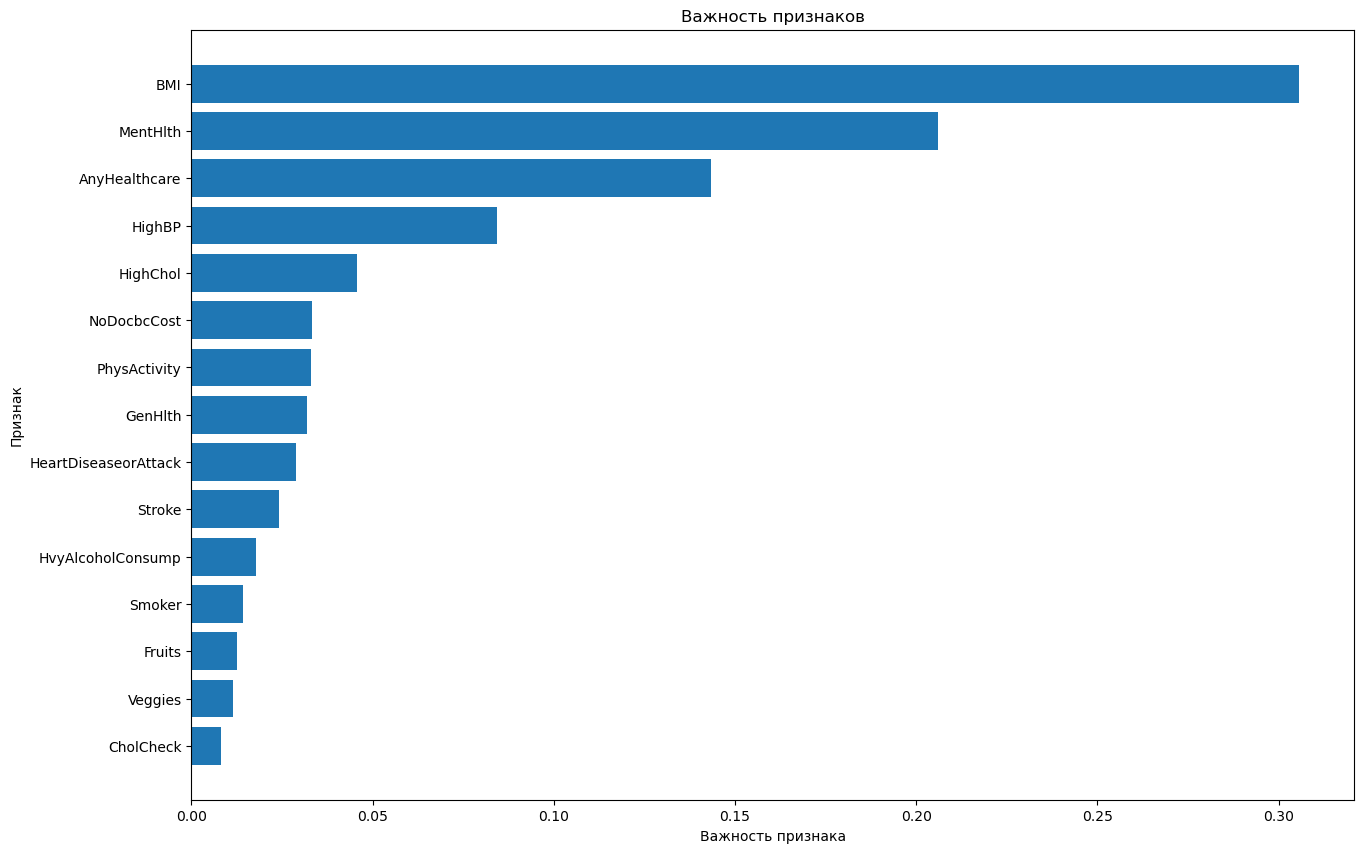

In [265]:

def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)  # Сортировка по важности признаков

    plt.figure(figsize=(15, 10))
    plt.barh(range(len(importances)), importances[indices], align='center')
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
    plt.title("Важность признаков")
    plt.show()

plot_feature_importances(rf, X_train.columns)


## Полиномиальный фичинг на исходном df

In [350]:

axis_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

axis_transformer = Pipeline(steps=[
    ('polynom', PolynomialFeatures(degree=2, include_bias=False))
])

CT = ColumnTransformer([
    ("axis_transformer", axis_transformer, axis_features),
], remainder='passthrough').set_output(transform='pandas')

rf = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', RandomForestClassifier(criterion='gini', n_estimators=1000, oob_score=True, n_jobs=-1))
])

transformed_X_train = CT.fit_transform(X_train)
transformed_X_train.shape

(32604, 49)

In [321]:
rf.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('axis_transformer',
                                                  Pipeline(steps=[('polynom',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False))]),
                                                  ['BMI', 'GenHlth', 'MentHlth',
                                                   'PhysHlth', 'Age',
                                                   'Education', 'Income'])])),
                ('estimator',
                 RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                        oob_score=True))])

In [322]:
y_train_pred = rf.predict(X_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(X_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

F-beta на обучающем наборе (beta=sqrt(2)): 0.997
F-beta на тестовом наборе (beta=sqrt(2)): 0.735


In [ ]:
# Просто нагенерить фич - ухудшает метрику

## RFECV на исходном df

In [333]:
# Создаем настраиваемый скорер с F-бета метрикой
fbeta_scorer = make_scorer(fbeta_score, beta=np.sqrt(2))

In [337]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [339]:
rf = RandomForestClassifier(criterion='gini', n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42)
cv = StratifiedKFold(n_splits=4)
rfecv = RFECV(estimator=rf, step=1, cv=cv, scoring=fbeta_scorer, n_jobs=-1)

rfecv.fit(X_train, y_train)

print("Оптимальное количество признаков: %d" % rfecv.n_features_)
# Получаем отобранные признаки
selected_features = X_train.columns[rfecv.support_]
print("Отобранные признаки:", list(selected_features))

# Получаем удаленные признаки
removed_features = X_train.columns[~rfecv.support_]
print("Удаленные признаки:", list(removed_features))

# X_train_selected = rfecv.transform(X_train)
# X_test_selected = rfecv.transform(X_test)

Оптимальное количество признаков: 21
Отобранные признаки: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Удаленные признаки: []


In [ ]:
# Ага прикольно, за 142 сек получил что все признаки важны))) 

## RFECV на поли фичинге

In [392]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [394]:
fbeta_scorer = make_scorer(fbeta_score, beta=np.sqrt(2))

In [396]:
axis_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

axis_transformer = Pipeline(steps=[
    ('polynom', PolynomialFeatures(degree=2, include_bias=False))
])

CT = ColumnTransformer([
    ("axis_transformer", axis_transformer, axis_features),
], remainder='passthrough').set_output(transform='pandas')

rf = Pipeline(steps=[
    ('preproc', CT),
    ('estimator', RandomForestClassifier(criterion='gini', n_estimators=1000, oob_score=True, n_jobs=-1))
])

transformed_X_train = CT.fit_transform(X_train)
transformed_X_train.shape

(32604, 49)

In [398]:
rf = RandomForestClassifier(criterion='gini', n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42)
cv = StratifiedKFold(n_splits=3)
rfecv = RFECV(estimator=rf, step=1, cv=cv, scoring=fbeta_scorer, n_jobs=-1)

rfecv.fit(transformed_X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                       oob_score=True, random_state=42),
      n_jobs=-1,
      scoring=make_scorer(fbeta_score, response_method='predict', beta=1.4142135623730951))

In [399]:
print("Оптимальное количество признаков: %d" % rfecv.n_features_)

transformed_feature_names = transformed_X_train.columns

selected_features = transformed_feature_names[rfecv.support_]
print("Отобранные признаки:", list(selected_features))

removed_features = transformed_feature_names[~rfecv.support_]
print("Удаленные признаки:", list(removed_features))

Оптимальное количество признаков: 47
Отобранные признаки: ['axis_transformer__BMI', 'axis_transformer__GenHlth', 'axis_transformer__MentHlth', 'axis_transformer__PhysHlth', 'axis_transformer__Age', 'axis_transformer__Education', 'axis_transformer__Income', 'axis_transformer__BMI^2', 'axis_transformer__BMI GenHlth', 'axis_transformer__BMI MentHlth', 'axis_transformer__BMI PhysHlth', 'axis_transformer__BMI Age', 'axis_transformer__BMI Education', 'axis_transformer__BMI Income', 'axis_transformer__GenHlth^2', 'axis_transformer__GenHlth MentHlth', 'axis_transformer__GenHlth PhysHlth', 'axis_transformer__GenHlth Age', 'axis_transformer__GenHlth Education', 'axis_transformer__GenHlth Income', 'axis_transformer__MentHlth^2', 'axis_transformer__MentHlth PhysHlth', 'axis_transformer__MentHlth Age', 'axis_transformer__MentHlth Education', 'axis_transformer__MentHlth Income', 'axis_transformer__PhysHlth^2', 'axis_transformer__PhysHlth Age', 'axis_transformer__PhysHlth Education', 'axis_transforme

In [ ]:
# Оптимальное количество признаков: 47
# Отобранные признаки: ['axis_transformer__BMI', 'axis_transformer__GenHlth', 'axis_transformer__MentHlth', 'axis_transformer__PhysHlth', 'axis_transformer__Age', 'axis_transformer__Education', 'axis_transformer__Income', 'axis_transformer__BMI^2', 'axis_transformer__BMI GenHlth', 'axis_transformer__BMI MentHlth', 'axis_transformer__BMI PhysHlth', 'axis_transformer__BMI Age', 'axis_transformer__BMI Education', 'axis_transformer__BMI Income', 'axis_transformer__GenHlth^2', 'axis_transformer__GenHlth MentHlth', 'axis_transformer__GenHlth PhysHlth', 'axis_transformer__GenHlth Age', 'axis_transformer__GenHlth Education', 'axis_transformer__GenHlth Income', 'axis_transformer__MentHlth^2', 'axis_transformer__MentHlth PhysHlth', 'axis_transformer__MentHlth Age', 'axis_transformer__MentHlth Education', 'axis_transformer__MentHlth Income', 'axis_transformer__PhysHlth^2', 'axis_transformer__PhysHlth Age', 'axis_transformer__PhysHlth Education', 'axis_transformer__PhysHlth Income', 'axis_transformer__Age^2', 'axis_transformer__Age Education', 'axis_transformer__Age Income', 'axis_transformer__Education^2', 'axis_transformer__Education Income', 'axis_transformer__Income^2', 'remainder__HighBP', 'remainder__HighChol', 'remainder__Smoker', 'remainder__Stroke', 'remainder__HeartDiseaseorAttack', 'remainder__PhysActivity', 'remainder__Fruits', 'remainder__Veggies', 'remainder__HvyAlcoholConsump', 'remainder__NoDocbcCost', 'remainder__DiffWalk', 'remainder__Sex']
# Удаленные признаки: ['remainder__CholCheck', 'remainder__AnyHealthcare']

In [402]:
# Преобразуем тестовые данные
transformed_X_test = CT.transform(X_test)

In [404]:
# Трансформируем тренировочные и тестовые данные с помощью обученного RFECV
X_train_selected = rfecv.transform(transformed_X_train)
X_test_selected = rfecv.transform(transformed_X_test)

In [410]:
rf_final = RandomForestClassifier(criterion='gini', n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42)
rf_final.fit(X_train_selected, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=42)

In [428]:
# Предсказания для тестового набора
y_test_pred = rf_final.predict(X_test_selected)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

F-beta на тестовом наборе (beta=sqrt(2)): 0.748


## SequentialFeatureSelector

In [ ]:
# select_f = SequentialFeatureSelector(
#     RandomForestClassifier(criterion='gini', n_estimators=1000, oob_score = True, n_jobs=-1),
#     n_features_to_select=15,
#     direction="forward",
#     n_jobs=-1
# )

# select_f.fit(X_train, y_train)

# mask = select_f.get_support()

# plt.matshow(mask.reshape(1, -1), cmap='gray_r', aspect=0.3)
# plt.yticks([])
# plt.xlabel("Индекс признака")
# plt.title("Выбранные признаки")
# plt.show()

# selected_features = X.columns[mask]
# print("Выбранные признаки:", selected_features.tolist())

# end_time = datetime.now()
# print("Время завершения:", end_time)


In [ ]:
# df_features = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack',
#                        'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
#                        'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Diabetes_binary']].copy()

In [ ]:
# X = df_features.drop('Diabetes_binary', axis=1)
# y = df_features['Diabetes_binary']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# rf = RandomForestClassifier(criterion='gini', n_estimators=1000, oob_score = True, n_jobs=-1) 
# rf.fit(X_train, y_train)

# print('Правильность на OOB: {:.3f}'.format(rf.oob_score_))

# y_train_pred = rf.predict(X_train)
# f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
# print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# # Предсказания для тестового набора
# y_test_pred = rf.predict(X_test)
# f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
# print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

## Extra Trees

In [247]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [249]:
et = ExtraTreesClassifier(
    n_estimators=100,  # Количество деревьев
    random_state=42,
    n_jobs=-1,         # Использовать все доступные ядра
    criterion="entropy"  # Критерий разделения (можно поменять на 'gini')
)

In [251]:
et.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_jobs=-1, random_state=42)

In [252]:
# Оценка модели
y_train_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)

# Вычисление F-beta для теста и обучения
beta = np.sqrt(2)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=beta)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=beta)

# Вывод результатов
print(f"F-beta на обучающей выборке (beta={beta:.2f}): {f_beta_train:.3f}")
print(f"F-beta на тестовой выборке (beta={beta:.2f}): {f_beta_test:.3f}")

F-beta на обучающей выборке (beta=1.41): 0.997
F-beta на тестовой выборке (beta=1.41): 0.739


## Попытка подбора гп на Random Forest вручную

In [ ]:
# param_grid = {
#     'n_estimators': [1000],
#     'max_depth': [None, 10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2', None],
#     'bootstrap': [True],
#     'criterion': ['gini', 'entropy']
# }

In [ ]:
# X = df.drop('Diabetes_binary', axis=1)
# y = df['Diabetes_binary']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# rf = RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score = True, n_jobs=-1) 
# rf.fit(X_train, y_train)

In [ ]:
print('Правильность на OOB: {:.3f}'.format(rf.oob_score_))

y_train_pred = rf.predict(X_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(X_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

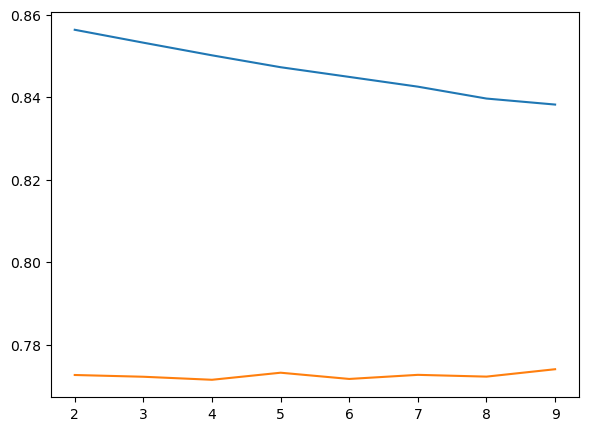

In [495]:
sc_train1 =[]
sc_test1 = []
sc_train2 =[]
sc_test2 = []
n_estimators = [n for n in range(2, 10, 1)] 

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs = -1, criterion= 'gini', max_features='sqrt', max_depth=10, min_samples_split=9)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
    y_test_pred = rf.predict(X_test)
    f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
    sc_train1.append(f_beta_train)
    sc_test1.append(f_beta_test)

# for n in n_estimators:
#     rf = RandomForestClassifier(n_estimators=500, max_depth=13, random_state=42, n_jobs = -1, criterion= 'entropy', max_features=n)
#     rf.fit(X_train, y_train)
    
#     y_train_pred = rf.predict(X_train)
#     f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
#     y_test_pred = rf.predict(X_test)
#     f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
    
#     sc_train2.append(f_beta_train)
#     sc_test2.append(f_beta_test)
    
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
# ax2.plot(n_estimators,sc_train2)
# ax2.plot(n_estimators,sc_test2)


In [499]:
# Итотоговая модель пока что
# rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs = -1, criterion= 'gini', max_features='sqrt', max_depth=10, min_samples_split=9)

## Градиентный бустинг

In [505]:
rf = GradientBoostingClassifier(random_state=42)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(X_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

F-beta на обучающем наборе (beta=sqrt(2)): 0.778
F-beta на тестовом наборе (beta=sqrt(2)): 0.771


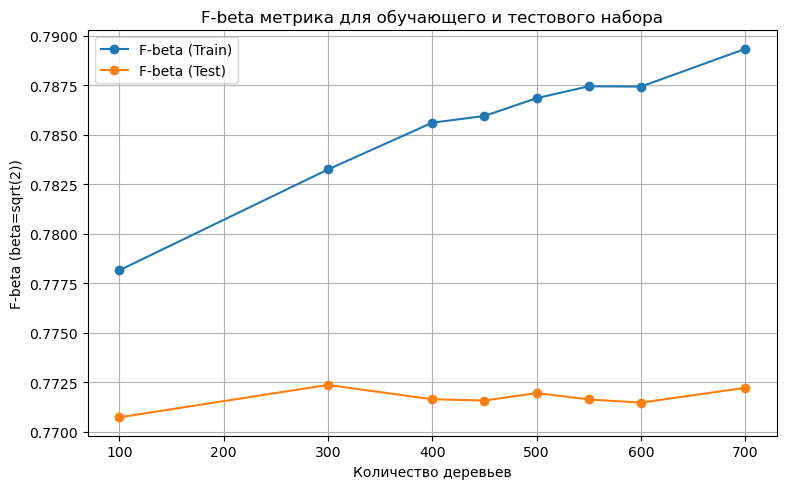

In [512]:
f_beta_train_scores = []
f_beta_test_scores = []

n_estimators = [100, 300, 400, 450, 500, 550, 600, 700]

for n in n_estimators:
    rf = GradientBoostingClassifier(random_state=42, n_estimators=n)
    rf.fit(X_train, y_train)
        
    # F-beta для обучающего набора
    y_train_pred = rf.predict(X_train)
    f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
    f_beta_train_scores.append(f_beta_train)
    
    # F-beta для тестового набора
    y_test_pred = rf.predict(X_test)
    f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
    f_beta_test_scores.append(f_beta_test)

# Построение графиков
plt.figure(figsize=(15, 5))

# График F-beta метрик
plt.subplot(1, 2, 2)
plt.plot(n_estimators, f_beta_train_scores, label='F-beta (Train)', marker='o')
plt.plot(n_estimators, f_beta_test_scores, label='F-beta (Test)', marker='o')
plt.xlabel('Количество деревьев')
plt.ylabel('F-beta (beta=sqrt(2))')
plt.title('F-beta метрика для обучающего и тестового набора')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## На данный момент единственное что ощутимо подняло метрику

In [833]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [835]:
class_weights = {0: 1, 1: 3}
sample_weight = np.array([class_weights[y] for y in y_train])


rf = GradientBoostingClassifier(random_state=42, n_estimators=300)
rf.fit(X_train, y_train, sample_weight=sample_weight)

y_train_pred = rf.predict(X_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(X_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

F-beta на обучающем наборе (beta=sqrt(2)): 0.823
F-beta на тестовом наборе (beta=sqrt(2)): 0.815


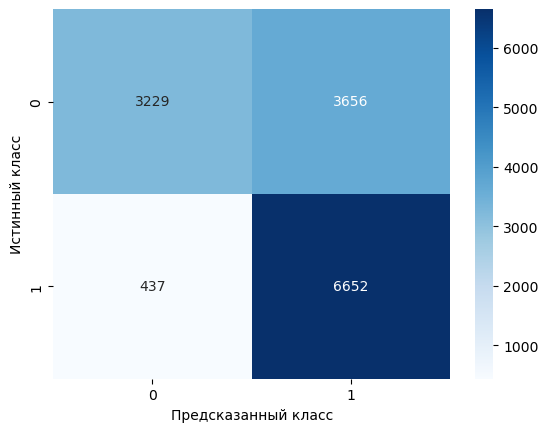

In [836]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

In [838]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs = -1, criterion= 'gini', max_features='sqrt', max_depth=10, min_samples_split=9)
rf.fit(X_train, y_train, sample_weight=sample_weight)

y_train_pred = rf.predict(X_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(X_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

F-beta на обучающем наборе (beta=sqrt(2)): 0.830
F-beta на тестовом наборе (beta=sqrt(2)): 0.817


## ROC-AUC

позиция порога 0.5 -  4065
в позиции 4500 для ROC
fpr:     0.691  tpr:        0.981  thresholds:,0.291
recall:  0.981  precision:, 0.590  thresholds:,0.291


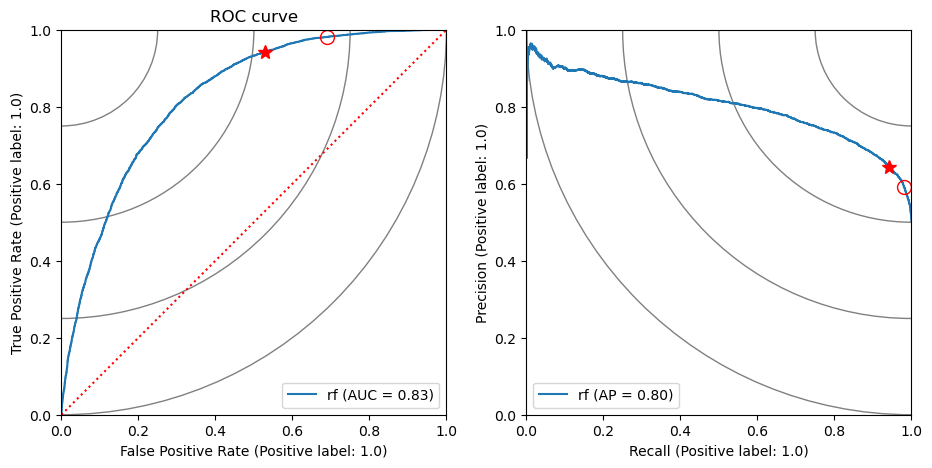

In [677]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label = None)
#######################################################
pos = 4500 # зададим порог (2) (21, 61)
point = find_nearest(thresholds,0.5) # найдем позицию порога вероятности 0.5 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! звездочка
#######################################################
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11, 5))

RocCurveDisplay.from_estimator(rf, X_test, y_test, name = 'rf', ax=ax1)
ax1.set_title("ROC curve")
ax1.plot([0,1],[0,1], color="r", ls=":")
ax1.plot(fpr[point],tpr[point], '*', markersize=10, color="r")
ax1.plot(fpr[pos],tpr[pos], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((0, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((0, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((0, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((0, 1), 1, color='gray',fill=False)
ax1.add_patch(circle0)
ax1.add_patch(circle1)
ax1.add_patch(circle2)
ax1.add_patch(circle3)
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))

precision, recall, thresholds_pr = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label = None)
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, name = 'rf', ax=ax2)
point_pr = find_nearest(thresholds_pr,0.5)  # найдем позицию порога вероятности 0.5
pos_pr = find_nearest(thresholds_pr,thresholds[pos]) # найдем позицию порога для thresholds в позиции pos

ax2.plot(recall[point_pr],precision[point_pr], '*', markersize=10, color="r")
ax2.plot(recall[pos_pr],precision[pos_pr], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((1, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((1, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((1, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((1, 1), 1, color='gray',fill=False)
ax2.add_patch(circle0)
ax2.add_patch(circle1)
ax2.add_patch(circle2)
ax2.add_patch(circle3)
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))

print( 'позиция порога 0.5 - ', point)
print( 'в позиции', pos, 'для ROC')
print( f'fpr:     {fpr[pos]:.3f}',       f' tpr:        {tpr[pos]:.3f}',          f' thresholds:,{thresholds[pos]:.3f}')
print( f'recall:  {recall[pos_pr]:.3f}', f' precision:, {precision[pos_pr]:.3f}', f' thresholds:,{thresholds[pos]:.3f}')


In [679]:
fixed_thresh_clf = FixedThresholdClassifier(rf, threshold=0.291)
fixed_thresh_clf.fit(X_train, y_train)
y_pred = fixed_thresh_clf.predict(X_test)

In [680]:
f_beta_test = fbeta_score(y_test, y_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

F-beta на тестовом наборе (beta=sqrt(2)): 0.816


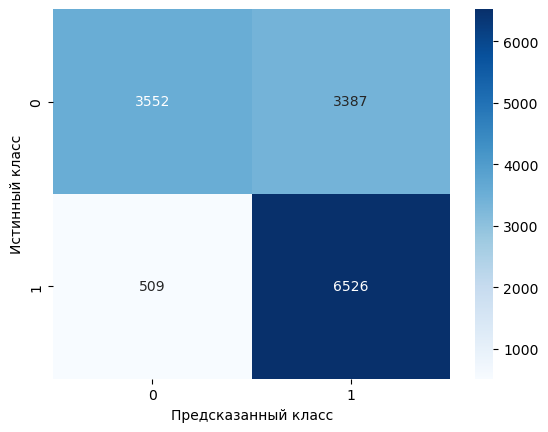

In [681]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

## FeatureTools

In [904]:
df_ft = df.copy()
df_ft['patient_id'] = df_ft.index

X = df_ft.drop('Diabetes_binary', axis=1)
y = df_ft['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

es = ft.EntitySet(id='diabetes_data')

es = es.add_dataframe(
    dataframe_name='patients',
    dataframe=X_train,
    index='patient_id'
)

trans_primitives = ['add_numeric', 'multiply_numeric', 'divide_numeric', 'natural_logarithm']

# Генерируем новые признаки
feature_matrix_train, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name='patients',
    trans_primitives=trans_primitives,
    max_depth=1
)

feature_matrix_train.replace([np.inf, -np.inf], np.nan, inplace=True)
feature_matrix_train.dropna(axis=1, how='any', inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [908]:
# Убедимся, что в тестовых данных есть 'patient_id'
X_test = X_test.copy()
X_test['patient_id'] = X_test.index

# Создаем EntitySet для тестовых данных
es_test = ft.EntitySet(id='diabetes_test')

es_test = es_test.add_dataframe(
    dataframe_name='patients',
    dataframe=X_test,
    index='patient_id'
)

In [910]:
# Генерируем признаки для тестовых данных, используя feature_defs
feature_matrix_test = ft.calculate_feature_matrix(
    features=feature_defs,
    entityset=es_test
)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [916]:
feature_matrix_test.replace([np.inf, -np.inf], np.nan, inplace=True)
feature_matrix_test.dropna(axis=1, how='any', inplace=True)

In [921]:
# Синхронизируем y_train и y_test с индексами feature_matrix
y_train = y_train.loc[feature_matrix_train.index]
y_test = y_test.loc[feature_matrix_test.index]

In [ ]:
# feature_matrix_train

In [930]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs = -1)#, random_state=42, n_jobs = -1, criterion= 'gini', max_features='sqrt', max_depth=10, min_samples_split=9)
rf.fit(feature_matrix_train, y_train, sample_weight=sample_weight)

y_train_pred = rf.predict(feature_matrix_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(feature_matrix_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

F-beta на обучающем наборе (beta=sqrt(2)): 0.996
F-beta на тестовом наборе (beta=sqrt(2)): 0.753


**После этого надо было бы отбирать признаки, но уже нет времени \
Впрочем поли фичинг показал что не факт что сработало бы**

In [944]:
class_weights = {0: 1, 1: 3}
sample_weight = np.array([class_weights[y] for y in y_train])


rf = GradientBoostingClassifier(random_state=42, n_estimators=300)
rf.fit(feature_matrix_train, y_train, sample_weight=sample_weight)

y_train_pred = rf.predict(feature_matrix_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(feature_matrix_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

KeyboardInterrupt: 

In [940]:
importances = rf.feature_importances_
feature_names = feature_matrix_train.columns

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print('Топ-10 наиболее важных признаков:')
print(feature_importances.head(10))


Топ-10 наиболее важных признаков:
                             feature  importance
141                 GenHlth + HighBP    0.242897
337                    Age * GenHlth    0.195011
332                        Age * BMI    0.078128
22                         Age + BMI    0.063106
374                    BMI * GenHlth    0.035668
153    HeartDiseaseorAttack + HighBP    0.034263
99                 DiffWalk + HighBP    0.033854
165                HighBP + HighChol    0.028016
142               GenHlth + HighChol    0.026625
154  HeartDiseaseorAttack + HighChol    0.014194


In [942]:
# Добавляем новые признаки
df['GenHlth + HighBP'] = df['GenHlth'] + df['HighBP']
df['Age * GenHlth'] = df['Age'] * df['GenHlth']
df['Age * BMI'] = df['Age'] * df['BMI']
df['Age + BMI'] = df['Age'] + df['BMI']
df['BMI * GenHlth'] = df['BMI'] * df['GenHlth']
df['HeartDiseaseorAttack + HighBP'] = df['HeartDiseaseorAttack'] + df['HighBP']
df['DiffWalk + HighBP'] = df['DiffWalk'] + df['HighBP']
df['HighBP + HighChol'] = df['HighBP'] + df['HighChol']
df['GenHlth + HighChol'] = df['GenHlth'] + df['HighChol']
df['HeartDiseaseorAttack + HighChol'] = df['HeartDiseaseorAttack'] + df['HighChol']

In [950]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [954]:
class_weights = {0: 1, 1: 3}
sample_weight = np.array([class_weights[y] for y in y_train])


rf = GradientBoostingClassifier(random_state=42, n_estimators=300)
rf.fit(X_train, y_train, sample_weight=sample_weight)

y_train_pred = rf.predict(X_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(X_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

F-beta на обучающем наборе (beta=sqrt(2)): 0.826
F-beta на тестовом наборе (beta=sqrt(2)): 0.817
